# Полиноми у NumPy-у

**Садржај:**
1. [Полиноми као вектори коефицијената](#Полиноми-као-вектори-коефицијената)
    1. [Хорнеров облик и Хорнерова шема](#Хорнеров-облик-и-Хорнерова-шема)
    1. [Факторисани облик полинома](#Факторисани-облик-полинома)
1. [Алгебра полинома](#Алгебра-полинома)

In [1]:
import numpy as np
import matplotlib as mplb
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import numpy.random as rndm

Полиноми представљају класу функција од великог значаја. Као прво, вредности полинома се израчунавају употребом две основне операције: сабирањем и множењем. Тиме и израчунавање извода и интеграла над њима буде једноставно. На рачунарима, све елементарне математичке функције се приближно израчунавају преко полинома. Основни објекти линеарне алгебре су у тесној вези са полиномима преко спектралне теорије.

***

## Полиноми као вектори коефицијената

За полином $p(t)=a_0t^n+a_{1}t^{n-1}+\dots+a_{n-1}t+a_n$ кажемо да је дат у **стандардном облику**. Уколико је $a_0\neq0,$ полином $p(t)$ је **степена** $n.$ Када нисмо сигурни у услов $a_0\neq0,$ za $p(t)$ кажемо да је полином **степена не већег од** $n.$ 

Полином $p(t)$ је **моничан** за вредност водећег коефицијента $a_0=1.$
     

Рад са полиномима преко њихових вектора коефицијената један је од најбитнијих елемената примене матричног рачуна. Python је кроз NumPy библиотеку опремљен и [функцијама](https://numpy.org/doc/stable/reference/routines.polynomials.html) специјализованим за такав начин рада са полиномима. Наиме, полином 
$$P_n(x)=p_0x^n+p_1x^{n-1}+\dots+p_{n-1}x+p_n$$ поистовећује се са вектором својих коефицијената $P_n(x)\equiv\begin{bmatrix}p_0&p_1&\dots&p_{n-1}&p_n\end{bmatrix}^T.$ Индексирање коефицијената полинома прилагођено је начину индексирања вектора у Python-у.
Тако је нпр. $P_4(x)=x^4+2\quad\Longrightarrow\quad P_4\equiv\begin{bmatrix}1&0&0&0&2\end{bmatrix}.$

Операције над векторима и матрицама могу да се прилагоде за рад са полиномима задатим преко вектора коефицијената.

**Пример 1.** Израчунаћемо матричним операцијама вредности полинома $P(x)=x^5+3x^4-2x^3-x^2+3x-2$ за $x\in\{-1,-0.5,1.3,2.2,3.4\}.$ У те сврхе можемо да искористимо Вандермондову матрицу. За израчунавање вредности полинома $$P(x)=p_0x^n+p_{1}x^{n-1}+\dots+p_{n-1}x+p_n=\displaystyle\sum_{k=0}^np_kx^{n-k}$$ за серију вредности аргумената $x\in\{a_0,a_1,\dots,a_m\}$ уз ознаку
Вандермондове матрице $V_{n+1}(a_0,a_1,\dots,a_m)=\begin{bmatrix}a_0^{n}&a_0^{n-1}&\dots&a_0&1\\
a_1^{n}&a_1^{n-1}&\dots&a_1&1\\
\vdots&\vdots&&\vdots&\vdots\\
a_m^{n}&a_m^{n-1}&\dots&a_m&1\end{bmatrix},$ имамо
$$\begin{bmatrix}P(a_0)\\P(a_1)\\\vdots\\P(a_{m-1})\\P(a_m)\end{bmatrix}=
\begin{bmatrix}a_0^{n}&a_0^{n-1}&\dots&a_0&1\\
a_1^{n}&a_1^{n-1}&\dots&a_1&1\\
\vdots&\vdots&&\vdots&\vdots\\
a_m^{n}&a_m^{n-1}&\dots&a_m&1\end{bmatrix}\begin{bmatrix}p_0\\p_1\\\vdots\\p_{n-1}\\p_n\end{bmatrix}.$$
Због тога уведимо променљиве којима ће ова израчунавања над полиномом $P(x)=x^5+3x^4-2x^3-x^2+3x-2$ бити извршена.

Када је матрица $V_{n+1}(a_0,a_1,\dots,a_m)\equiv V_{n+1}(a)$ квадратна и регуларна добијамо поступак идентификације вектора коефицијената $p$ полинома $P$ на основу вектора његових вредности $P(a).$
$$P(a)=V_{n+1}(a) p\quad\Longrightarrow\quad p=V_{n+1}(a)^{-1}P(a)$$

In [2]:
p=np.array([1,3,-2,-1,3,-2])  #predstavljanje polinoma vektorom koeficijenata
st=p.size
a=np.array([-1,-0.5,1.3,2.2,3.4]) #vrednosti argumenta u kojima se racuna vrednost polinoma
start = timer()
Vand=np.vander(a,st)  #generisanje Vandermondove matrice
Pa=Vand@p #izracunavanje vrednosti polinoma P u tackama a
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")
print(Vand)
print(Pa)

Vreme izracunavanja:  0.018306300044059753 sec
[[-1.0000000e+00  1.0000000e+00 -1.0000000e+00  1.0000000e+00
  -1.0000000e+00  1.0000000e+00]
 [-3.1250000e-02  6.2500000e-02 -1.2500000e-01  2.5000000e-01
  -5.0000000e-01  1.0000000e+00]
 [ 3.7129300e+00  2.8561000e+00  2.1970000e+00  1.6900000e+00
   1.3000000e+00  1.0000000e+00]
 [ 5.1536320e+01  2.3425600e+01  1.0648000e+01  4.8400000e+00
   2.2000000e+00  1.0000000e+00]
 [ 4.5435424e+02  1.3363360e+02  3.9304000e+01  1.1560000e+01
   3.4000000e+00  1.0000000e+00]]
[ -2.       -3.34375   8.09723 100.27712 773.28704]


***

### Хорнеров облик и Хорнерова шема

Осим представљеног поступка који је меморијски неефикасан, представаљање полинома преко вектора коефицијената погодује ефикасном поступку израчунавања вредности полинома путем **Хорнерове шеме**. Кључ је у специјалном начину записивања полинома који зовемо **Хорнеров облик**.
\begin{align}
P_n(x)&=p_0x^n+p_1x^{n-1}+\dots+p_{n-1}x+p_n\\
&=\big(\dots\big((p_0x+p_1)x\big)x+\dots+p_{n-1}\big)x+p_n.
\end{align}
Хорнерова шема се описује следећом таблицом:
$$\begin{array}{c|c|c|c|c|c|c}
a&p_0&p_1&p_2&\dots&p_{n-1}&p_n\\\hline
&+0&+aq_0&+aq_1&\dots&+aq_{n-2}&+aq_{n-1}\\\hline
&q_0&q_1&q_2&\dots&q_{n-1}&P(a)
\end{array}$$
Њен садржај можемо да тумачимо и у својству дељења полинома линеарним полиномом $x-a.$
$$P(x)=\big(q_0x^{n-1}+q_1x^{n-2}+\dots+q_{n-1}\big)(x-a)+P(a).$$

**Пример 2.** Израчунаћемо вредности полинома $P_5(x)=3x^5-2.1x^4+1.12x^3-3.74,$ за вредности $x\in\{-1.3,-0.7,0.1,1.5,2.2,2.8,3.7\}$ по принципу Хорнерове шеме.

In [3]:
P5=np.array([3,-2.1,1.12,0,0,-3.74])

Реализоваћемо прво код за израчунавање вредности полинома за једну вредност аргумента, $a=2.2$ нпр. 

In [4]:
a=2.2
st=P5.size
#pocetak postupka Hornerove seme
P5a=P5[0]
start = timer()
for i in np.arange(1,st):
    P5a=P5a*a+P5[i]
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")
P5a    

Vreme izracunavanja:  0.0006628003902733326 sec


113.60096000000003

Резултат можемо да проверимо "ручним израчунавањем"

In [5]:
start = timer()
3*a**5-2.1*a**4+1.12*a**3-3.74
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")

Vreme izracunavanja:  0.00018299976363778114 sec


или Вандермондовом матрицом.

In [6]:
V1x6=np.vander([a],st)  #generisanje Vandermondove matrice
print(V1x6)

[[51.53632 23.4256  10.648    4.84     2.2      1.     ]]


In [7]:
start = timer()
V1x6@P5
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")

Vreme izracunavanja:  0.012145299930125475 sec


Сада можемо да прилагодимо претходни код за израчунавање вредности полинома за серију аргумената.

In [8]:
a=np.array([-1.3,-0.7,0.1,1.5,2.2,2.8,3.7])
n=a.size
start = timer()
P5a=P5[0]*np.ones(n)
for i in np.arange(1,st):
    P5a=P5a*a+P5[i]
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")
P5a  

Vreme izracunavanja:  0.009687900077551603 sec


array([ -23.33724,   -5.13258,   -3.73906,   12.19   ,  113.60096,
        408.07952, 1739.73626])

Резултат још једном можемо да проверимо "ручним израчунавањем".

In [9]:
start = timer()
3*a**5-2.1*a**4+1.12*a**3-3.74
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")

Vreme izracunavanja:  0.0002549998462200165 sec


Уграђена NumPy функција која служи за израчунавање вредности полинома путем Хорнерове шеме је `polyval`.

In [10]:
start = timer()
np.polyval(P5,a)
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")

Vreme izracunavanja:  0.0003027999773621559 sec


Упоредићемо сада времена израчунавања на полиному високог степена, за серију вредности аргумента.

In [11]:
n=231  #stepen polinoma je 230, ima 231 koeficijent
p=rndm.uniform(-3.5,3.5,n)  #generisanje koeficijenata polinoma P
m=50
x=rndm.uniform(-2.5,2.5,m)

In [12]:
Vmn=np.vander(x,n)  #generisanje Vandermondove matrice
Vmn.shape

(50, 231)

In [13]:
start = timer()
Vmn@p
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")

Vreme izracunavanja:  0.00013929978013038635 sec


In [14]:
start = timer()
np.polyval(p,x)
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")

Vreme izracunavanja:  0.0009304000996053219 sec


In [15]:
A=rndm.uniform(-3,3,(m,n))
A.shape

(50, 231)

In [16]:
start = timer()
A@p
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")

Vreme izracunavanja:  0.00016930000856518745 sec


***

### Факторисани облик полинома

Факторизација полинома је поступак његовог растављања у производ два или више полинома нижег степена од полазног. 
Канонска факторизација полинома је његово растављање у производ линеарних полинома,
$$P_n(x)=p_0(x-z_0)(x-z_1)\dots(x-z_{n-1}).$$
Овај облик има веома важну улогу у раду са полиномима. 

**Подсетник:** Када је $p_0=1$ полином зовемо **моничан**.

Задавање моничног полинома $M_n(x)=(x-z_0)(x-z_1)\dots(x-z_{n-1})$ преко вектора његових нула $\begin{bmatrix}z_0&z_1&\dots&z_{n-1}\end{bmatrix}$ омогућено је уграђеном NumPy функцијом `poly`. Функција враћа вектор коефицијената моничног полинома са задатим нулама, коефицијенти су поређани од најстаријег ка слободном члану.
```python
np.poly([z0,z1,...,z(n-1)])
```
$$M_n(x)=(x-z_0)(x-z_1)\dots(x-z_{n-1})=x^n+p_1x^{n-1}+\dots+p_{n-1}x+p_n\equiv\begin{bmatrix}1&p_1&\dots&p_{n-1}&p_n\end{bmatrix}^T$$

**Пример 3.** Потражићемо монични полином чије су све нуле (рачунајући и вишеструкости) $-1.2,\ 2.2i,\ 6.3,\ 3.1-2.3i.$

In [17]:
nule=np.array([-1.2, 2.2j, 6.3, 3.1-2.3j])
P4=np.poly(nule)
P4

array([  1.     +0.j    ,  -8.2    +0.1j   ,  13.31   +6.31j  ,
        -2.37  -35.538j , -38.2536-51.5592j])

Излаз наредбе дао је вектор коефицијената траженог моничног полинома четвртог степена,
$$P_4(x)=x^4+(-8.2    +0.1i)x^3+(13.31   +6.31i)x^2+(-2.37  -35.538i)x -38.2536-51.5592i.$$
Проверићемо израчунавањем да ли је заиста полином $P_4(x)$ са траженим нулама. Један начин јесте примена уграђене функције `np.polyval`.

In [18]:
np.polyval(P4,nule)

array([-7.10542736e-15-7.10542736e-15j, -7.10542736e-15-2.13162821e-14j,
        6.39488462e-14+1.13686838e-13j,  2.84217094e-14+0.00000000e+00j])

In [19]:
np.round(np.polyval(P4,nule),3)

array([-0.-0.j, -0.-0.j,  0.+0.j,  0.+0.j])

Други начин за проверу резултата јесу Вијетове формуле. 
\begin{align}
P_4(x)&=1\cdot x^4+p_1x^3+p_2x^2+p_3x+p_4=(x-z_0)(x-z_1)(x-z_2)(x-z_3),\\
&z_0+z_1+z_2+z_3=-p_1,\\
&z_0z_1+z_0z_2+z_0z_3+z_1z_2+z_1z_3+z_2z_3=p_2,\\
&z_0z_1z_2+z_0z_1z_3+z_0z_2z_3+z_1z_2z_3=-p_3,\\
&z_0z_1z_2z_3=p_4.
\end{align}
Њима можемо да утврдимо вредности коефицијената плинома $P_4.$

In [20]:
#provera koeficijenta p1
print(P4[1])
-np.sum(nule)

(-8.2+0.09999999999999964j)


(-8.200000000000001+0.09999999999999964j)

In [21]:
#provera koeficijenta p2
print(P4[2])
np.sum(nule[0]*nule[1:])+np.sum(nule[1]*nule[2:])+np.sum(nule[2]*nule[3:])

(13.309999999999999+6.310000000000004j)


(13.310000000000002+6.310000000000006j)

In [22]:
#provera koeficijenta p3
print(P4[3])
-np.prod(nule[1:])-np.prod(nule[[0,2,3]])-np.prod(nule[[0,1,3]])-np.prod(nule[:3])

(-2.370000000000001-35.538j)


(-2.37-35.538j)

In [23]:
#provera koeficijenta p4
print(P4[4])
np.prod(nule)

(-38.2536-51.559200000000004j)


(-38.2536-51.559200000000004j)

***

**Пример 4.** У раду са реалним полиномима можемо да користимо и графички приказ како бисмо проверили њихове карактеристике. Потражићемо монични полином $M_7(x)$ чије су све нуле (рачунајући и вишеструкости): $-1.2,\ -1.2,\ 2.2,\ 3.1,\ 3.1,\ 3.1,\ 6.3.$ Затим ћемо наћи полином $P_7(x)$ са истим нулама који још задовољава услов: 

а) $P_7(0)=2.35,\qquad$    б) $P_7(1)=3.12,\qquad$   в) $P_7(-1)=-3.64.$

In [24]:
nule=np.array([-1.2, -1.2, 2.2, 3.1, 3.1, 3.1, 6.3])
M7=np.poly(nule) #konstrukcija monicnog polinoma
#kreiranje podataka za grafik
x=np.linspace(-2,7,250)
M7x=np.polyval(M7,x)

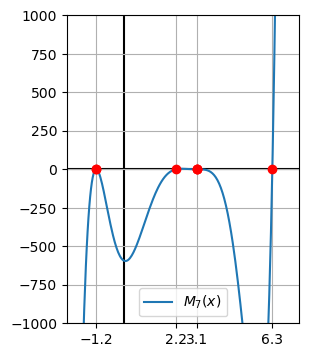

In [25]:
slika=plt.figure(figsize=(3,4))
plt.plot(x,M7x,label=r'$M_7(x)$')
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.plot(nule,np.zeros(7),'or')
plt.xticks([-1.2, 2.2, 3.1, 6.3])
plt.ylim(-1000,1000)
plt.legend()
plt.grid();

На основу моничног полинома $M_7(x)$ креираћемо тражене полиноме $P_7(x)=p_0 M_7(x)$ мењањем вредности водећег коефицијента. Постављањем услова $P_7(a)=b$ налазимо одговарајући водећи коефицијент:
$$P_7(a)=b\quad\Longleftrightarrow\quad p_0 M_7(a)=b\quad\Longrightarrow\quad p_0=\dfrac{b}{M_7(a)}\,.$$
Сва три случаја (под а,б и в) можемо истовремено да решимо.

In [26]:
b=np.array([2.35, 3.12, -3.64])
a=np.array([0, 1, -1])
p0=b/np.polyval(M7,a)
p0

array([-0.00395237, -0.01094446,  0.05652193])

Направићемо графички приказ добијених решења.

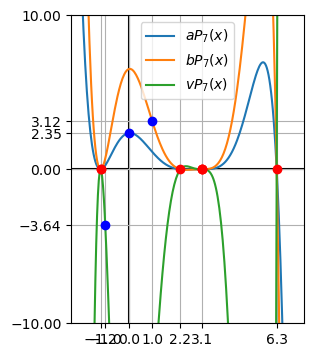

In [27]:
slika=plt.figure(figsize=(3,4))
plt.plot(x,p0[0]*M7x,label=r'$aP_7(x)$')
plt.plot(x,p0[1]*M7x,label=r'$bP_7(x)$')
plt.plot(x,p0[2]*M7x,label=r'$vP_7(x)$')
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.plot(nule,np.zeros(7),'or')
plt.plot(a,b,'ob')
plt.xticks([-1.2, -1, 0, 1, 2.2, 3.1, 6.3])
plt.yticks([-10, -3.64, 0, 2.35, 3.12, 10])
plt.ylim(-10,10)
plt.legend()
plt.grid();

***

## Алгебра полинома

Скуп полинома са коефицијентима из поља $\mathbb{K}$ степена не већег од $n\in\mathbb{N}_0$ означавамо са $\mathbb{P}_n[t],$
$$\mathbb{P}_n[t]=\left\{
\sum_{k\in[n]}a_{n-k}t^k\ \big|\ a_k\in\mathbb{K},\ k\in[n]
\right\}.$$     
Скуп свих полинома означавамо са $\mathbb{P}[t],$
$$\mathbb{P}[t]=\left\{
\sum_{k\in[n]}a_kt^k\ \big|\ n\in\mathbb{N}_0,\ a_k\in\mathbb{K},\ k\in[n] \right\}
=\bigcup_{n\in\mathbb{N}_0}\mathbb{P}_n[t].$$
Када желимо посебно да назначимо полиноме са коефицијентима из поља реалних бројева то обележавамо са $\mathbb{R}[t].$

Операције на простору полинома $\mathbb{P}_n[t],$ односно $\mathbb{P}[t]$  једноставно се описују кроз коефицијенте полинома у стандардном облику. За полиноме $ p,q\in\mathbb{P}_n[t]$ и $\alpha\in\mathbb{K}$
\begin{align}
     p(t)=a_0t^n&+a_{1}t^{n-1}+\dots+a_{n-1}t+a_n,\qquad 
     q(t)=b_0t^n+b_{1}t^{n-1}+\dots+b_{n-1}t+b_n,\\[8pt]
         (p+q)(t)&=p(t)+q(t)\\
         &=(a_0+b_0)t^n+(a_{1}+b_{1})t^{n-1}+\dots+(a_{n-1}+b_{n-1})t+(a_n+b_n),\\[10pt]
         (\alpha p)(t)&=\alpha\big(p(t)\big)=(\alpha a_0)t^n+(\alpha a_{1})t^{n-1}+\dots
         +(\alpha a_{n-1})t+(\alpha a_n).
\end{align}

Захваљујући овим операцијама $(\mathbb{P}_n[t],\mathbb{K},+,\cdot),$ као и $(\mathbb{P}[t],\mathbb{K},+,\cdot),$ представља векторски простор. 
Нула-вектор векторског простора полинома зовемо **нула-полином**,
$$p(t)+O(t)=p(t),\ \forall t\quad\Longleftrightarrow\quad p+O=p,$$
$$O(t)=0, \forall t,\quad O(t)=0\cdot t^n+0\cdot t^{n-1}+\dots +0\cdot t+0.$$
Нула-полином је константна функција која сваки аргумент слика у нулу.
Супротан вектор зовемо **супротан полином** и важи
$$p(t)+(-p(t))=0,\ \forall t\quad\Longleftrightarrow\quad p+(-p)=O,$$
$$-p(t)=-a_0t^n-a_{1}t^{n-1}-\dots-a_{n-1}t-a_n.$$

**Дефиниција 1.** Скуп вектора $(b)\subset V$ векторског простора $V$ представља **базу** ако има следеће две особине:
- Скуп вектора $(b)$ је **линеарно независан**: 
        
> Било који коначан подскуп вектора $b_0,b_1,\dots,b_k\in(b),\ k\geq0$ је линеарно независан, тј.
$$\alpha_0b_0+\alpha_1b_1+\dots+\alpha_kb_k=\theta\quad \Longrightarrow\quad \alpha_i=0,\ \forall i.$$

- Вектори скупа $(b)$ чине **потпун систем вектора**: 
        
> За произвољан вектор $v\in V$ постоји коначан подскуп вектора $b_0,b_1,\dots,b_k\in(b),$ тако да је $v$ представив преко њих  
>$$v=\alpha_0b_0+\alpha_1b_1+\dots+\alpha_kb_k,$$  тј. $\mathcal{L}(b)=V.$

Овакву базу векторског простора зовемо **Хамелова база**. Потпуност базе значи представљање било ког вектора $v$ преко само коначно много вектора базе.

Сваки векторски простор поседује Хамелову базу. Када је простор коначно-димензионалан, Хамелова база је састављена од коначно много вектора. 

Број елемената произвољне базе векторског простора $V$ је димензија тог простора, у ознаци $\dim(V).$ Када се база састоји од коначно много вектора, за векторски простор кажемо да је **коначно димензионналан**. У супротном векторски простор је **бесконачно димензионалан**. 

**Пример 5.**  Хамелове базе простора $\mathbb{P}_n[t]$ и $\mathbb{P}[t]$ чине редом мономи:
    $$\{1,t,t^2,\dots,t^n\},\qquad
    \{1,t,t^2,\dots,t^n,\dots\}.$$
Димензије ових простора су:
$$\dim(\mathbb{P}_n[t])=n+1,\qquad \dim(\mathbb{P}[t])=\aleph_0.$$

***

**Пример 6.** Коначан линеарно независан скуп вектора $v_0,v_1,\dots,v_k$ представља базу векторског простора $\mathcal{L}(v_0,v_1,\dots,v_k).$  Исто важи и за бесконачан скуп линеарно независних вектора $S,$ он је база простора $\mathcal{L}(S).$

***

За базе је уобичајено да користимо индексиране скупове вектора
$$(b)=\{b_i\ |\ i\in I\}$$
како би координате вектора у односу на базу биле индексирани скупови скалара $\{\alpha_i\ |\ i\in I\}.$ 
На тај начин повезујемо вредност кооординате са компонентом базе у представљању вектора.

Сваки вектор $v$ векторског простора у односу на Хамелову базу има само коначно много ненула координата $\alpha_i.$  У том контексту следећи запис има смисла, с обзиром да се представљање произвољног вектора $v$ своди на само коначно много сабирака,
$$v=\sum_{i\in I}\alpha_i\,b_i.$$

***

Упознаћемо још неке уграђене функције за рад са полиномима преко њихових вектора коефицијената. Најпре, функције којима се обезбеђује основна алгебра полинома.

Функцијом `polyadd` добијамо коефицијенте збира два полинома. Синтакса наредбе је:
>```python
polyadd(v ,u )
>```

Функцијом `polysub` добијамо коефицијенте разлике два полинома. Синтакса наредбе је:
>```python
polysub(v ,u )
>```

Осим операција векторског простора полиноми могу и да се множе. Операција множења полинома подлеже дистрибутивном закону, тј. слаже се са операцијама векторског простора.
\begin{align}
&P(x)\big(Q(x)+R(x)\big)=P(x)\,Q(x)+P(x)\,R(x),\\
&P(x)\big(\alpha Q(x)\big)=\alpha\big(P(x)\,Q(x)\big).
\end{align}

Функцијом `polymul` добијамо коефицијенте производа два полинома. Синтакса наредбе је:
>```python
polymul(v ,u )
>```

Функцијом `polydiv` добија се количник и остатак Еуклидовог дељења два полинома. Синтакса наредбе је:
>```python
polydiv(v ,u )
>```

Излаз наредбе представљају два низа, први садржи коефицијенте полинома количника, а други коефицијенте полинома остатка.

**Пример 7.** Одредићемо збир, разлику, производ и количник (са остатком) два полинома из претходних примера $P_4$ и $P_5.$

In [28]:
print("P4(x)=",P4)
print("P5(x)=",P5)
np.polyadd(P4,P5)

P4(x)= [  1.     +0.j      -8.2    +0.1j     13.31   +6.31j    -2.37  -35.538j
 -38.2536-51.5592j]
P5(x)= [ 3.   -2.1   1.12  0.    0.   -3.74]


array([  3.     +0.j    ,  -1.1    +0.j    ,  -7.08   +0.1j   ,
        13.31   +6.31j  ,  -2.37  -35.538j , -41.9936-51.5592j])

In [29]:
np.polysub(P5,P4)

array([  3.     +0.j    ,  -3.1    +0.j    ,   9.32   -0.1j   ,
       -13.31   -6.31j  ,   2.37  +35.538j ,  34.5136+51.5592j])

In [30]:
np.polymul(P5,P4)

array([  3.        +0.j      , -26.7       +0.3j     ,
        58.27     +18.72j    , -44.245   -119.753j   ,
       -94.8766   -72.9806j  ,  73.93816  +68.47176j ,
       -12.176032 -58.120304j, -49.7794   -23.5994j  ,
         8.8638  +132.91212j , 143.068464+192.831408j])

In [31]:
np.polydiv(P5,P4)

(array([ 3. +0.j , 22.5-0.3j]),
 array([ 145.66     -23.64j   , -294.258    -31.368j  ,
         178.7472  +953.5716j ,  872.43376+1148.60592j]))

Полиноме $P(x)=ix^2-x+2i$ и $Q(x)=(1+i)x+1-i$ приказаћемо као векторе њихових коефицијената. Одредићемо коефицијенте полинома $P+Q,\ P-Q,\ PQ$ користећи одговарајуће операције NumPy библиотеке.

In [32]:
P=np.array([1j,-1,2j])
Q=np.array([1+1j,1-1j])
print(np.polyadd(P,Q))
print(np.polysub(P,Q))
print(np.polymul(P,Q))

[0.+1.j 0.+1.j 1.+1.j]
[ 0.+1.j -2.-1.j -1.+3.j]
[-1.+1.j  0.+0.j -3.+3.j  2.+2.j]


***

Осим претходних основних операција, полиноми подлежу и операцијама над функцијама као што су  изводи и интеграли. 
Уграђеном функцијом `polyder` добијамо коефицијенте извода полинома. Синтакса наредбе је:
>```python
polyder(v [,r=1])
>```

Уколико полином $P(x)=p_0x^n+p_{1}x^{n-1}+\dots+p_{n-1}x+p_n=\displaystyle\sum_{k=0}^np_kx^{n-k}$ представимо вектором његових коефицијената $P(x)\equiv\begin{bmatrix}p_0&p_1&\dots&p_{n-1}&p_n\end{bmatrix}^T,$ тада функција `polyder` враћа вектор коефицијената изводног полинома $$P'(x)=np_0x^{n-1}+(n-1)p_{1}x^{n-2}+\dots+p_{n-1}=\displaystyle\sum_{k=0}^{n-1}(n-k)p_kx^{n-k-1}\equiv\begin{bmatrix}np_0&(n-1)p_1&\dots&p_{n-1}\end{bmatrix}^T.$$
Опционим аргументом `r` можемо да дефинишемо и ред извода већи од првог. Излаз ће бити вектор коефицијената одговарајућег изводног полинома.

Функцијом `polyint` добијамо коефицијенте примитивне функције полинома, који је наравно опет полином. Синтакса наредбе је:
>```python
polyint(v [,r=1])
>```

**Пример 8.** Одредићемо извод и примитивну функцију полинома $P_5(x)=3x^5-2.1x^4+1.12x^3-3.74$ из претходних примера. Приметимо да је
\begin{align}
&P_5'(x)=15x^4-8.4x^3+3.36x^2,\\
&\displaystyle\int_0^xP_5(t)dt=\displaystyle\int_0^x\left(3t^5-2.1t^4+1.12t^3-3.74\right)dt=\dfrac{3}{6}x^6-\dfrac{2.1}{5}x^5+\dfrac{1.12}{4}x^4-3.74x.
\end{align}

In [33]:
print("P5(x)=",P5)
np.polyder(P5)

P5(x)= [ 3.   -2.1   1.12  0.    0.   -3.74]


array([15.  , -8.4 ,  3.36,  0.  ,  0.  ])

In [34]:
np.polyint(P5)

array([ 0.5 , -0.42,  0.28,  0.  ,  0.  , -3.74,  0.  ])

Познавањем примитивне функције у могућности смо да израчунамо и вредност одређеног интеграла на основу Њутн-Лајбницове формуле.

$$\int_{a}^bf(x)\,dx=F(b)-F(a),\qquad F(x)=\int f(x)\,dx$$

***

**Пример 9.** Креираћемо Тејлоров полином степена $3$ функције $f(x)=\dfrac{x(x^2-1)}{x + 2}$  користећи информације о функцији и њеним изводима у тачки $x=0.5.$  

[Изводи](https://www.wolframalpha.com/input?i=Table%5BD%5B%28x%28x%5E2-1%29%29%2F%28x+%2B+2%29%5D%2C%7Bi%2C1%2C3%7D%5D%2F%2FSimplify) функције $f(x)$ до трећег реда гласе:
\begin{align}
&f(x)=\dfrac{x(x^2-1)}{x + 2}=\dfrac{x^3-x}{x + 2},\\
&f'(x)=\dfrac{2 (x^3 +3 x^2-1)}{(x+2)^2},\\
&f''(x)=\dfrac{2 (x^3 + 6 x^2 + 12 x+2)}{(x+2)^3},\\
&f'''(x)=\dfrac{36}{(x+2)^4}
\end{align}

In [35]:
c=0.5
fc=np.polyval([1,0,-1,0],c)/(c+2)
f1c=np.polyval([2,6,0,-2],c)/((c+2)**2)
f2c=np.polyval([2,12,24,4],c)/((c+2)**3)
f3c=36/((c+2)**4)
#kreiranje koeficijenata
T3=np.array([f3c/6,f2c/2,f1c,fc])

За графички приказ функције $f(x)$ полинома $T_3(x)$ креирамо низ њихових вредности на вектору $x.$

In [36]:
x=np.linspace(-1,2,100)
fx=(x*(x**2-1))/(x+2)

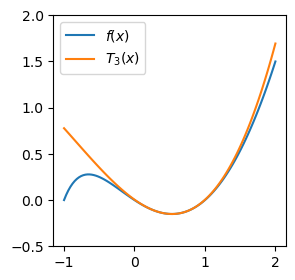

In [37]:
#izrachunavanje po principu Hornerove seme
T3x=np.polyval(T3,x-c)
slika=plt.figure(figsize=(3,3))
plt.plot(x,fx,label=r'$f(x)$')
plt.plot(x,T3x,label=r'$T_3(x)$')
plt.ylim([-0.5,2])
plt.legend();    

***